# Setup workspace, load data, and calculate needed variables

### Import packages and setup options/directories

In [1]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import datetime
import geopandas as gpd
from glob import glob
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import regionmask
#from reverse_colormap import reverse_colormap # in python dir
import scipy.stats as stats
from scipy import interpolate as spinterpolate
from shapely.geometry import Polygon
import warnings
import xarray as xr

In [2]:
%matplotlib inline

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# - See what dir we're in
os.getcwd()

'/opt/skipjack-bigeye-separation/python/bet_skj_separation_paper_v2'

In [5]:
# - Choose set types you want to analyze
# ...settypes options are: afaddfad, afaddfadlog, allsets,
# unassociated, unassociatedother
# ...catchorcpue options are: catch, CPUE 
settypes = 'afaddfadlog'
catchorcpue = 'CPUE'

In [6]:
# - Set data path
dpath = '/opt/skipjack-bigeye-separation/data/'

In [7]:
# - Set saved out figure path
figpath = '/opt/skipjack-bigeye-separation/python/bet_skj_separation_paper_v2/figures_' + settypes + catchorcpue + '/'

### Define fxns

In [8]:
%run helper_notebooks/bet_skj_sep_fxns.ipynb

### Load WCPFC and ENSO time series data

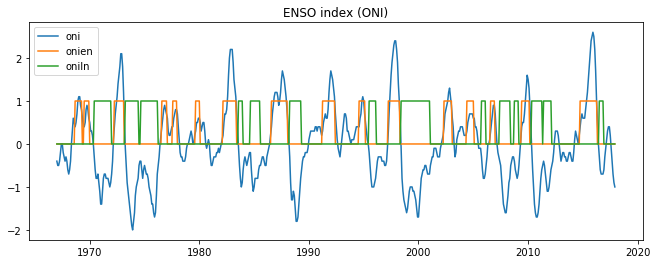

In [9]:
%run helper_notebooks/wcpfc_enso_load_and_calc.ipynb

### Compute temporal correlations btwn BET and BET:SKJ vs. SKJ CPUE

In [10]:
%run helper_notebooks/compute_bet_b2s_vs_skj.ipynb

### Create EEZ map mask

In [11]:
%run helper_notebooks/create_eez_mask_map.ipynb

### Load oceanographic data

In [12]:
%run helper_notebooks/env_vars_load_and_calc.ipynb

### Put all CPUE and env vars into one xr dataset for ease of use by following calculations

In [13]:
dsallvars = bettoskj_cp_tot.to_dataset(name='bettoskj_cp_tot')
dsallvars['skj_cp_tot'] = skj_cp_tot
dsallvars['bet_cp_tot'] = bet_cp_tot
dsallvars['sst'] = sst
dsallvars['temp100'] = temp100
dsallvars['tcd'] = tcd
dsallvars['sss'] = sss
dsallvars['o2100'] = o2100
dsallvars['po2100'] = po2100
dsallvars['thd'] = thd
dsallvars['logchl'] = logchl
dsallvars['mld'] = mld
dsallvars['ssha'] = ssha
dsallvars['oni'] = oni
dfallvars = dsallvars.to_dataframe()
dfallvars.drop(columns=['depth'], inplace=True)
dfallvars.reset_index(inplace=True)

### Compute quotient analyses for SKJ and BET CPUE vs. environmental conditions

In [14]:
%%script false --no-raise-error
%run helper_notebooks/compute_qa_bet_skj_cpue.ipynb

### Compute temporal correlations btwn SKJ, BET, BET:SKJ CPUE vs. environmental conditions

In [15]:
%run helper_notebooks/compute_bet_skj_b2s_vs_env.ipynb

# Plot **new** figures

### New Supplementary Figure 14 (climatological and ENSO anomalous stdevs of env vars)

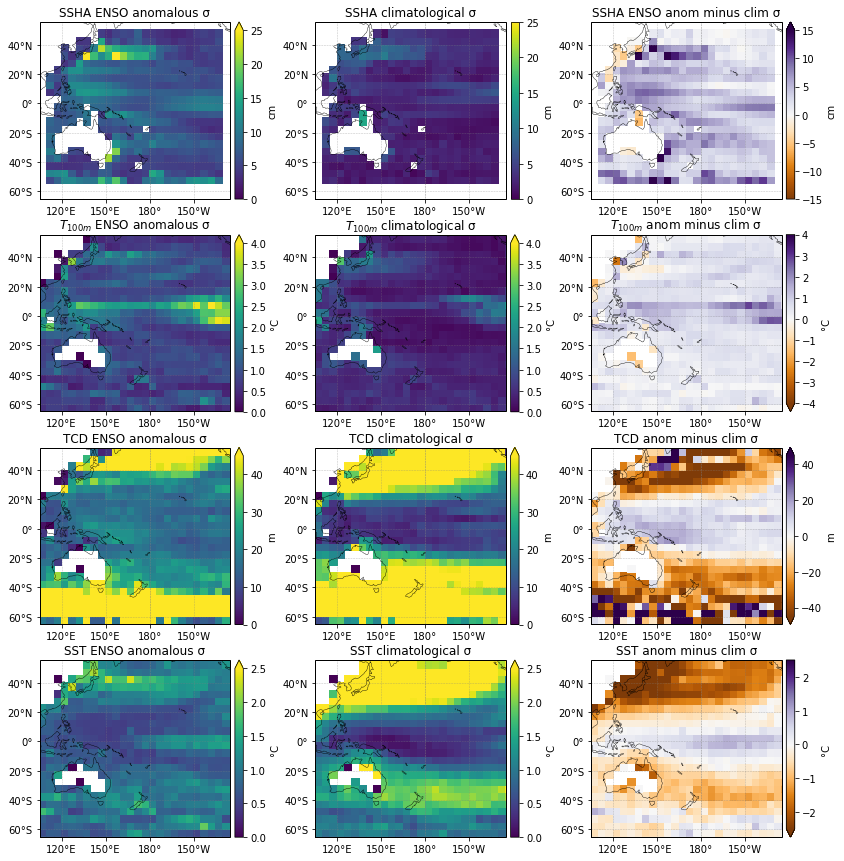

In [92]:
%run figure_notebooks/new_suppfig14.ipynb

### New Figure 5 (ENSO boxplots w/ # of obs)

SKJ CPUE boxplot # of months in obs:
PLW 192 723 211
FSM 248 1049 277
PNG 368 1531 424
SLB 109 500 157
NRU 74 260 70
MHL 48 204 63
KIR-G 170 574 129
TUV 54 175 59
KIR-P 36 74 10
KIR-L 35 39 0
BET CPUE boxplot # of months in obs:
PLW 192 723 211
FSM 248 1049 277
PNG 368 1531 424
SLB 109 500 157
NRU 74 260 70
MHL 48 204 63
KIR-G 170 574 129
TUV 54 175 59
KIR-P 36 74 10
KIR-L 35 39 0
BET:SKJ CPUE boxplot # of months in obs:
PLW 192 723 211
FSM 248 1047 275
PNG 368 1529 424
SLB 109 500 157
NRU 73 259 70
MHL 48 202 61
KIR-G 170 568 129
TUV 53 174 59
KIR-P 36 73 10
KIR-L 34 38 0


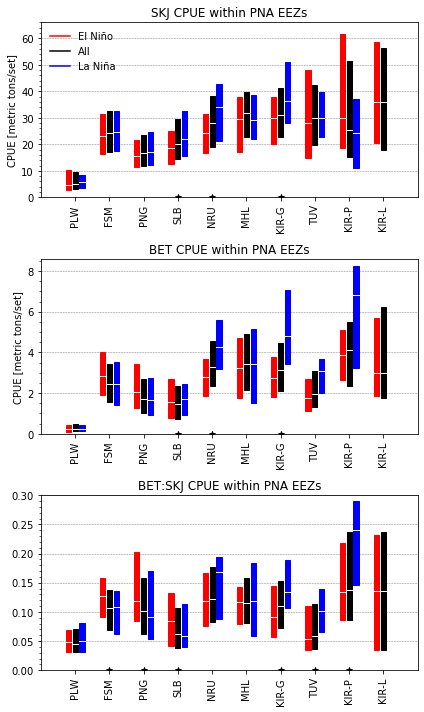

In [162]:
%run figure_notebooks/new_fig5.ipynb

### New Figure 2 (stdevs)

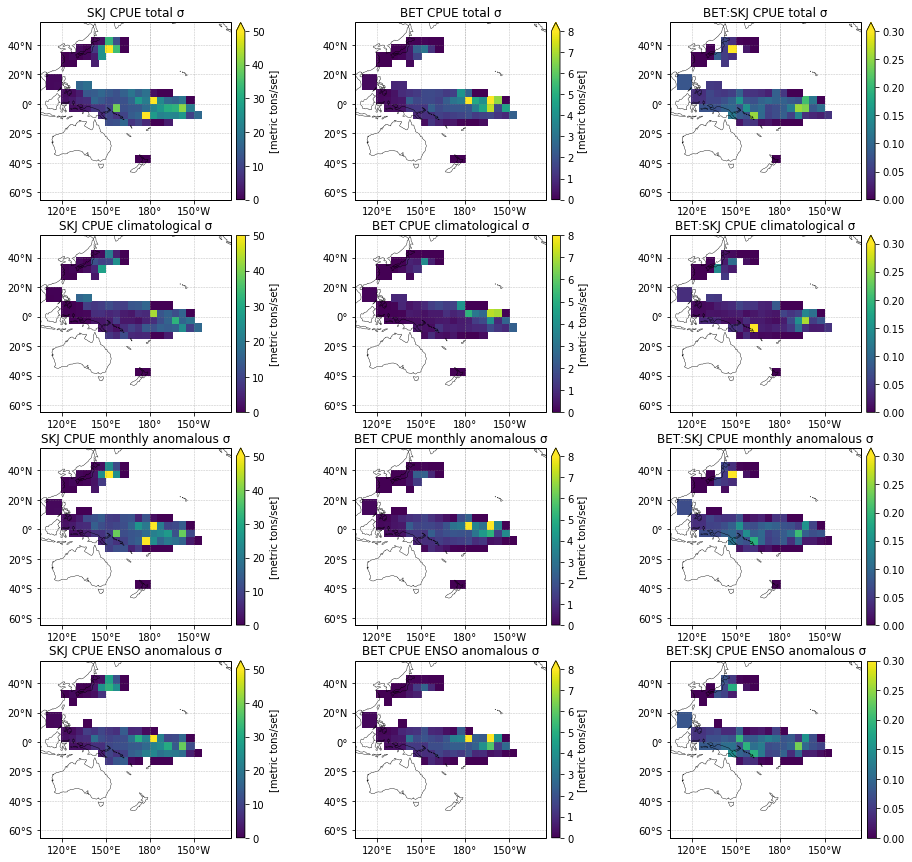

In [94]:
# Absolute stdevs
absnormnow = 'abs'
%run figure_notebooks/new_fig2.ipynb

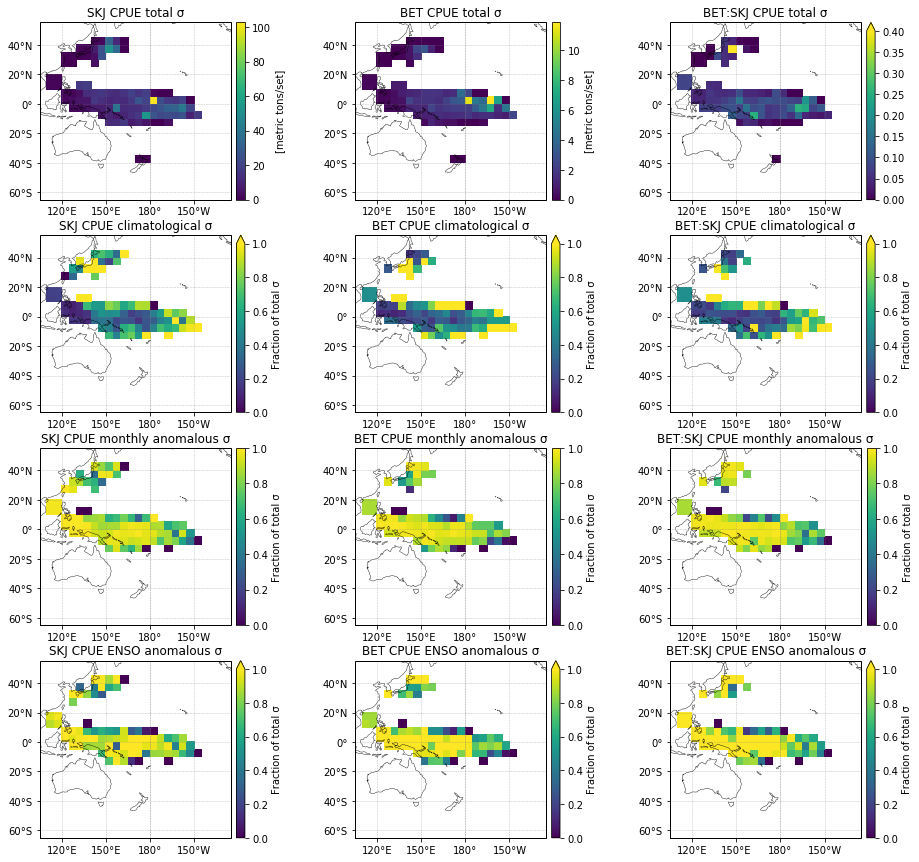

In [92]:
# Normalized by total stdevs
absnormnow = 'norm'
%run figure_notebooks/new_fig2.ipynb

### New EEZ Map Areas w/ 5-deg res

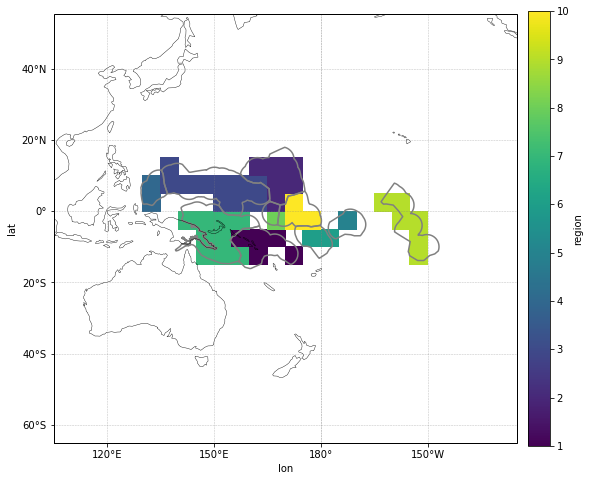

In [39]:
%run figure_notebooks/eez_map_areas_5deg.ipynb

### New Supplementary Figure 5 (season total and anom maps)

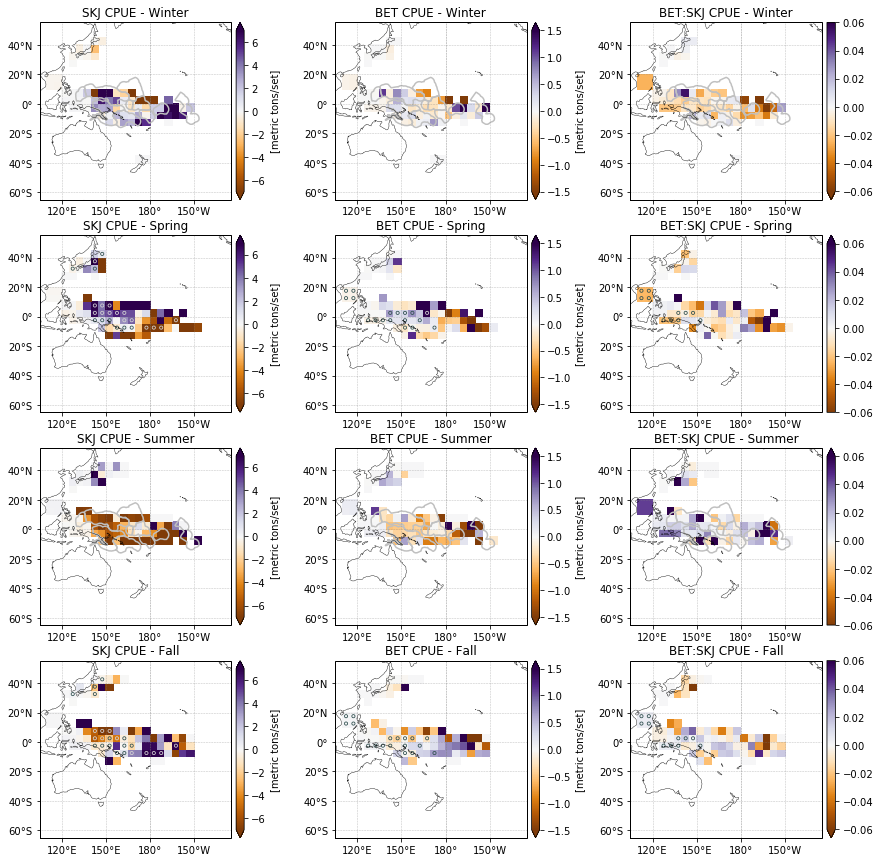

In [49]:
# Season avgs - overall mean
totanomnow = 'anom'
%run figure_notebooks/new_suppfig5.ipynb

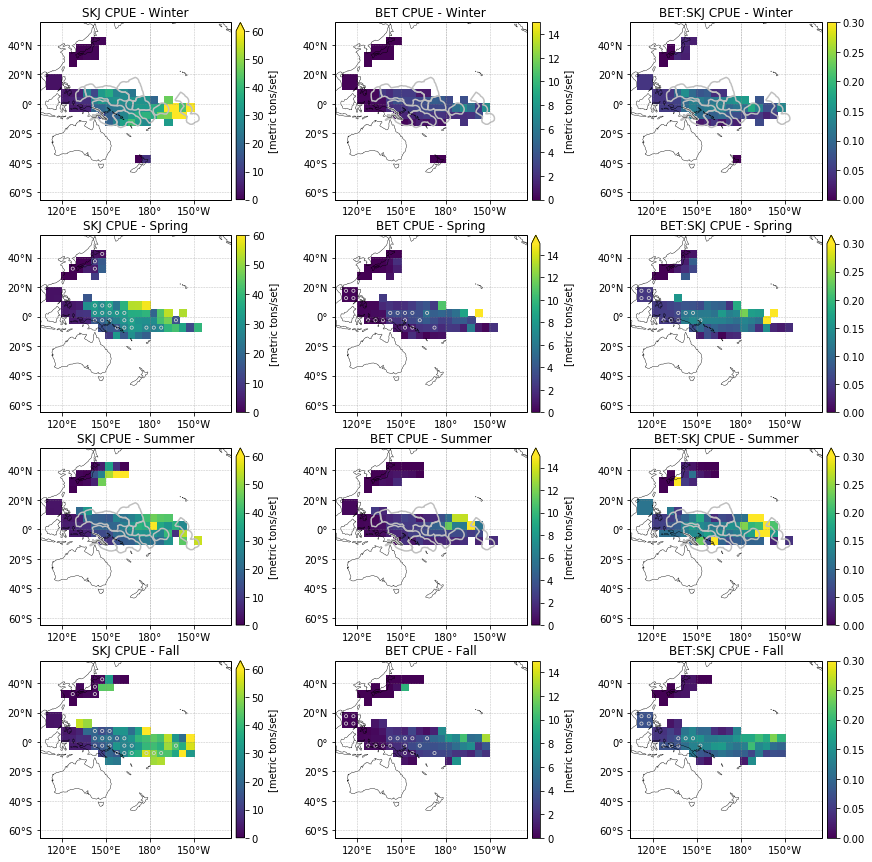

In [50]:
# Season avgs
totanomnow = 'tot'
%run figure_notebooks/new_suppfig5.ipynb

### New Figure 4 (ENSO total and anom maps)

In [19]:
print(bettoskj_cp_tot_mean.where(~np.isinf(bettoskj_cp_tot_mean)).max())
print(bettoskj_cp_tot_ln.where(~np.isinf(bettoskj_cp_tot_mean)).max())
print(bettoskj_cp_tot_en.where(~np.isinf(bettoskj_cp_tot_mean)).max())
# --> use 0.32 as the max cbar lim

<xarray.DataArray 'bettoskj_cp_tot' ()>
array(0.31276375, dtype=float32)
<xarray.DataArray 'bettoskj_cp_tot' ()>
array(0.3985334, dtype=float32)
<xarray.DataArray 'bettoskj_cp_tot' ()>
array(0.29921323, dtype=float32)


In [37]:
print((bet_cp_tot_ln-bet_cp_tot_mean).max())
print((bettoskj_cp_tot_ln-bettoskj_cp_tot_mean).max())

<xarray.DataArray 'bet_cp_tot' ()>
array(13.468099, dtype=float32)
<xarray.DataArray 'bettoskj_cp_tot' ()>
array(0.15623052, dtype=float32)


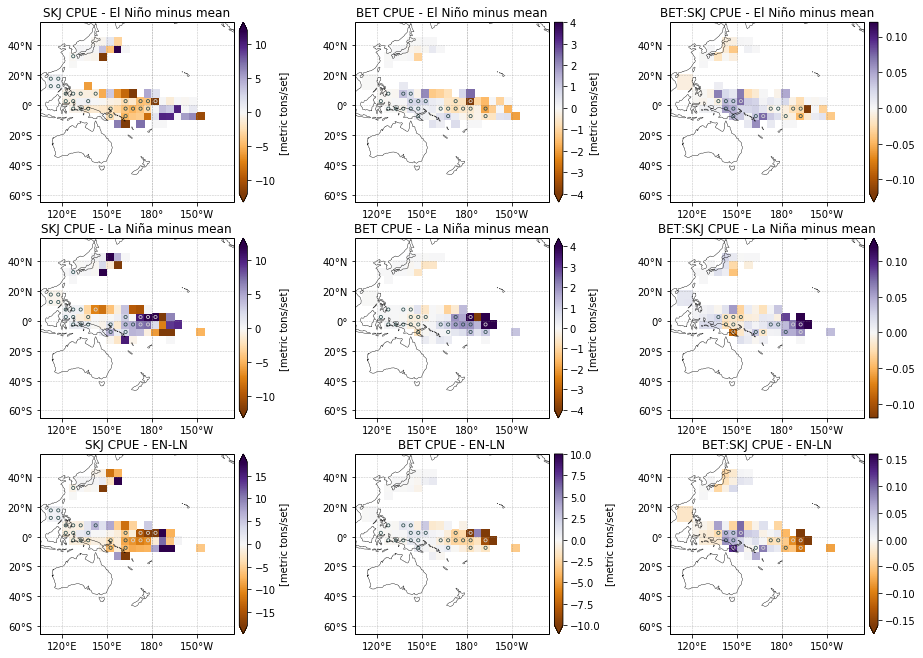

In [38]:
# EN/LN total minus overall mean
totanomnow = 'totmmean'
%run figure_notebooks/new_fig4.ipynb

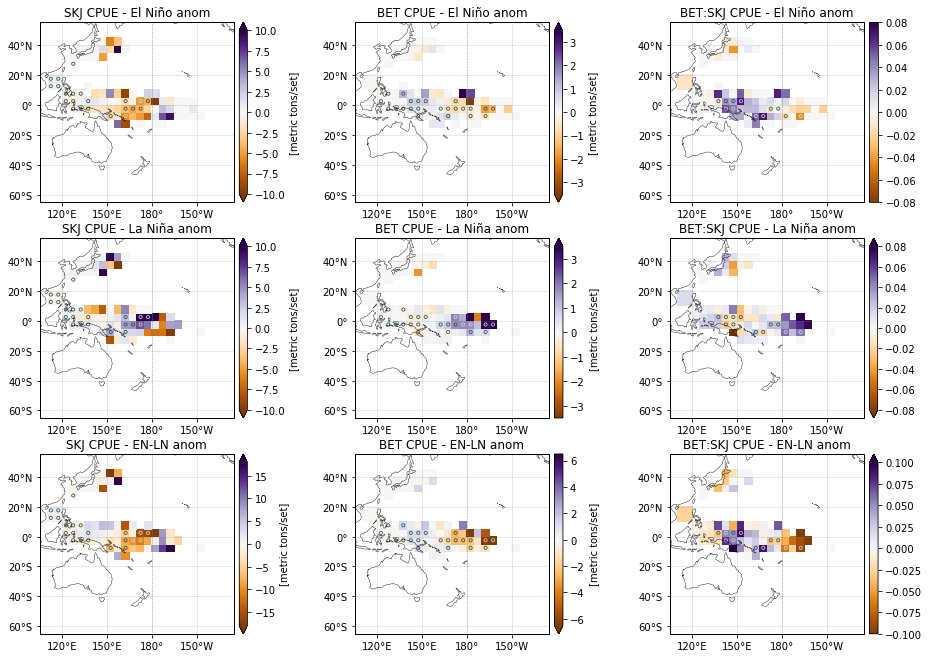

In [39]:
# EN/LN anoms
totanomnow = 'anom'
%run figure_notebooks/new_fig4.ipynb

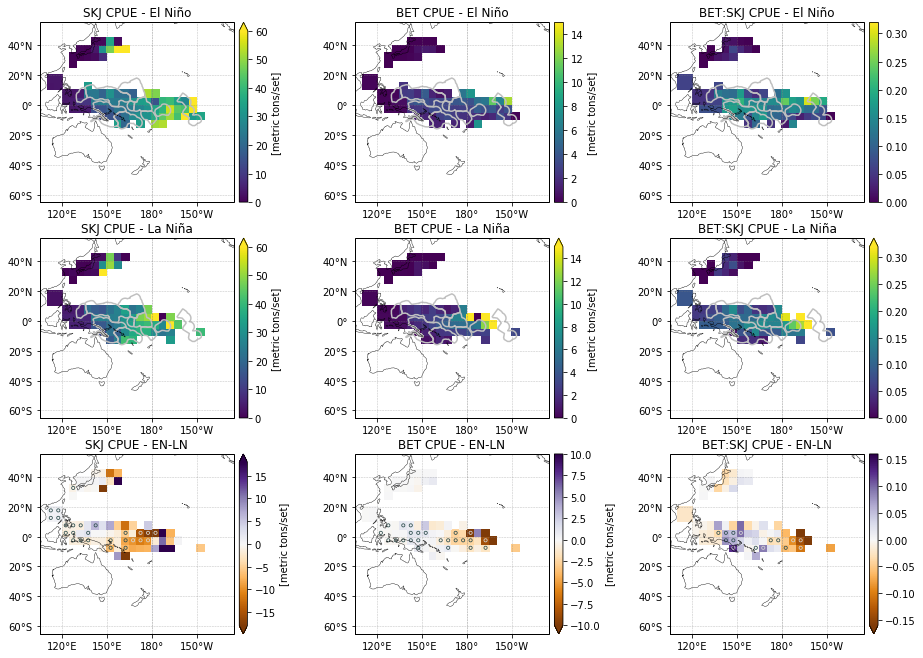

In [40]:
# EN/LN totals 
totanomnow = 'tot'
%run figure_notebooks/new_fig4.ipynb

### New Figure 5 (seasons boxplots)

SKJ CPUE boxplot # of months in obs:
PLW 182 169 186 186
FSM 193 294 306 256
PNG 451 391 294 395
SLB 185 133 68 114
NRU 72 59 63 66
MHL 42 40 66 56
KIR-G 116 119 173 166
TUV 48 45 29 53
KIR-P 14 16 23 21
KIR-L 6 0 9 22
BET CPUE boxplot # of months in obs:
PLW 182 169 186 186
FSM 193 294 306 256
PNG 451 391 294 395
SLB 185 133 68 114
NRU 72 59 63 66
MHL 42 40 66 56
KIR-G 116 119 173 166
TUV 48 45 29 53
KIR-P 14 16 23 21
KIR-L 6 0 9 22
BET:SKJ CPUE boxplot # of months in obs:
PLW 182 169 186 186
FSM 193 294 305 255
PNG 451 391 293 394
SLB 185 133 68 114
NRU 72 59 63 65
MHL 41 40 66 55
KIR-G 116 115 172 165
TUV 48 45 28 53
KIR-P 14 16 22 21
KIR-L 6 0 8 22


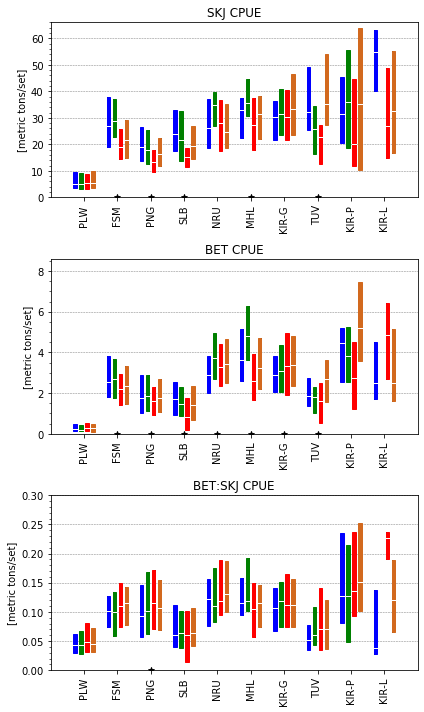

In [161]:
%run figure_notebooks/new_fig5_seasons.ipynb

# Plot figures

### Supplementary Figure 2

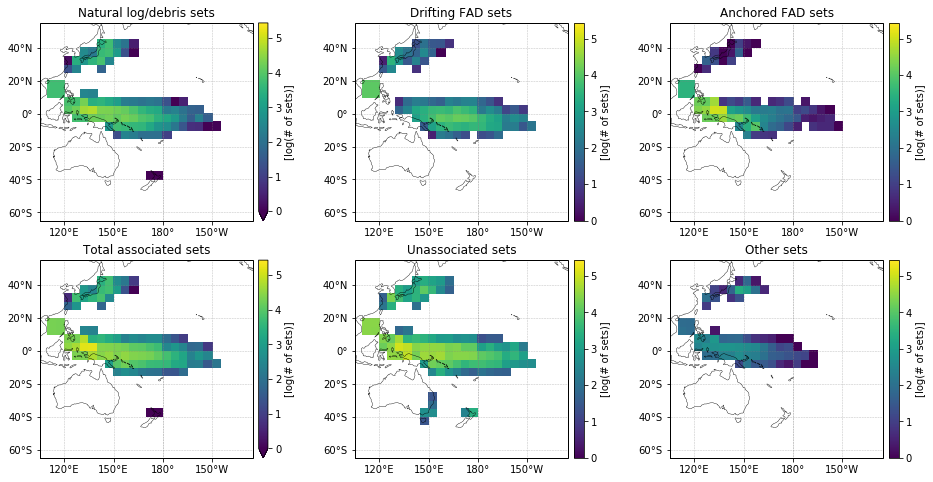

In [32]:
%run figure_notebooks/suppfig2.ipynb

### Supplementary Figure 3

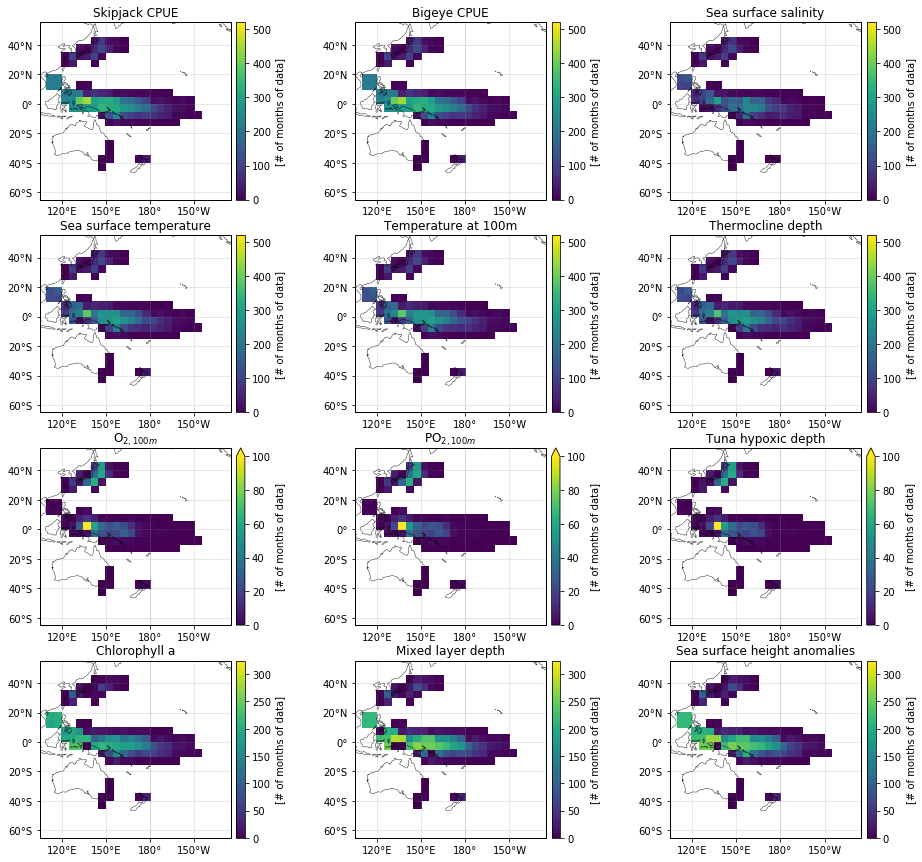

# of monthly mean data pts overlapping w/ skj_cp_tot:
lat: 10286
time: 10286
bettoskj_cp_tot: 10048
skj_cp_tot: 10286
bet_cp_tot: 10286
sst: 7693
temp100: 7866
tcd: 7531
sss: 5903
o2100: 954
po2100: 908
thd: 910
logchl: 6792
mld: 7673
ssha: 8161
oni: 10286
# of monthly mean data pts overlapping w/ bet_cp_tot:
lat: 10286
lon: 10286
bettoskj_cp_tot: 10048
skj_cp_tot: 10286
bet_cp_tot: 10286
sst: 7693
temp100: 7866
tcd: 7531
sss: 5903
o2100: 954
po2100: 908
thd: 910
logchl: 6792
mld: 7673
ssha: 8161
oni: 10286
# of monthly mean data pts overlapping w/ bettoskj_cp_tot:
lon: 10048
time: 10048
bettoskj_cp_tot: 10048
skj_cp_tot: 10048
bet_cp_tot: 10048
sst: 7479
temp100: 7649
tcd: 7319
sss: 5723
o2100: 916
po2100: 870
thd: 872
logchl: 6625
mld: 7470
ssha: 7955
oni: 10048


In [16]:
%run figure_notebooks/suppfig3.ipynb

### Figure 1

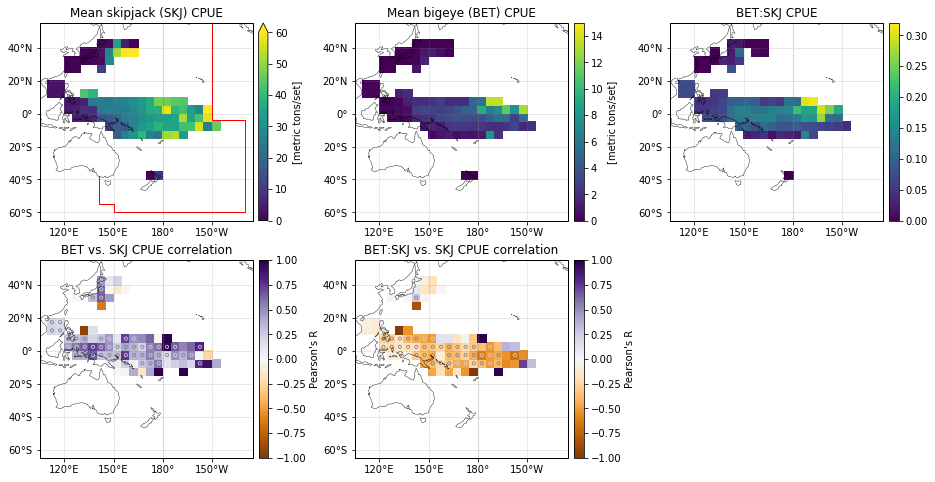

In [41]:
%run figure_notebooks/fig1.ipynb

### Figure 2

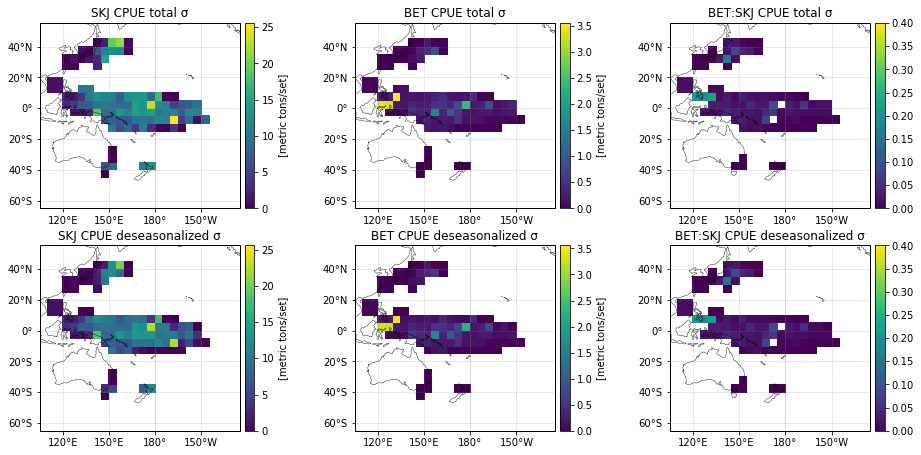

In [18]:
%run figure_notebooks/fig2.ipynb

### Figure 4

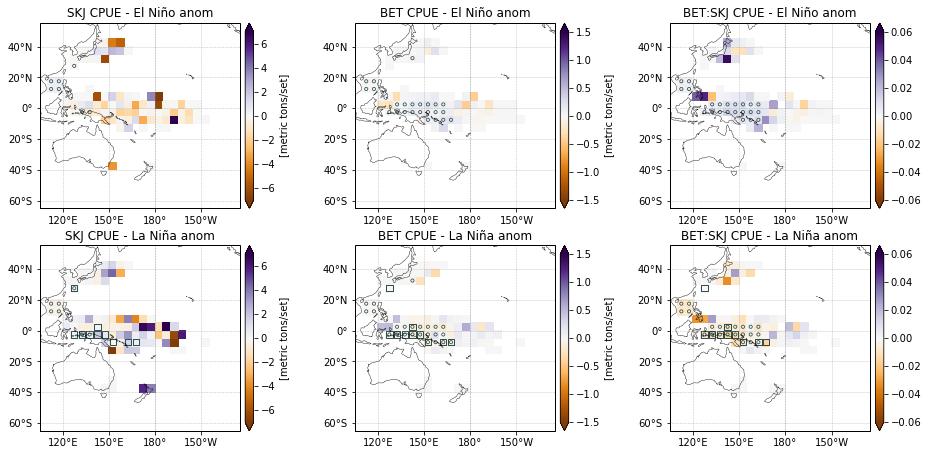

In [19]:
%run figure_notebooks/fig4.ipynb

### Figure 5

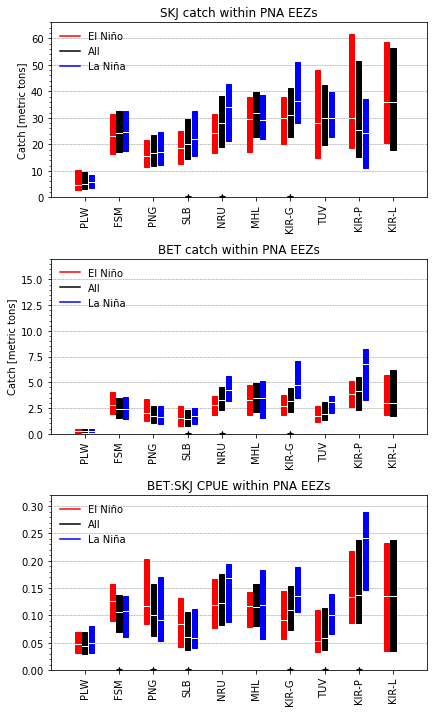

In [22]:
%run figure_notebooks/fig5.ipynb

### Supplementary Figures 4-5

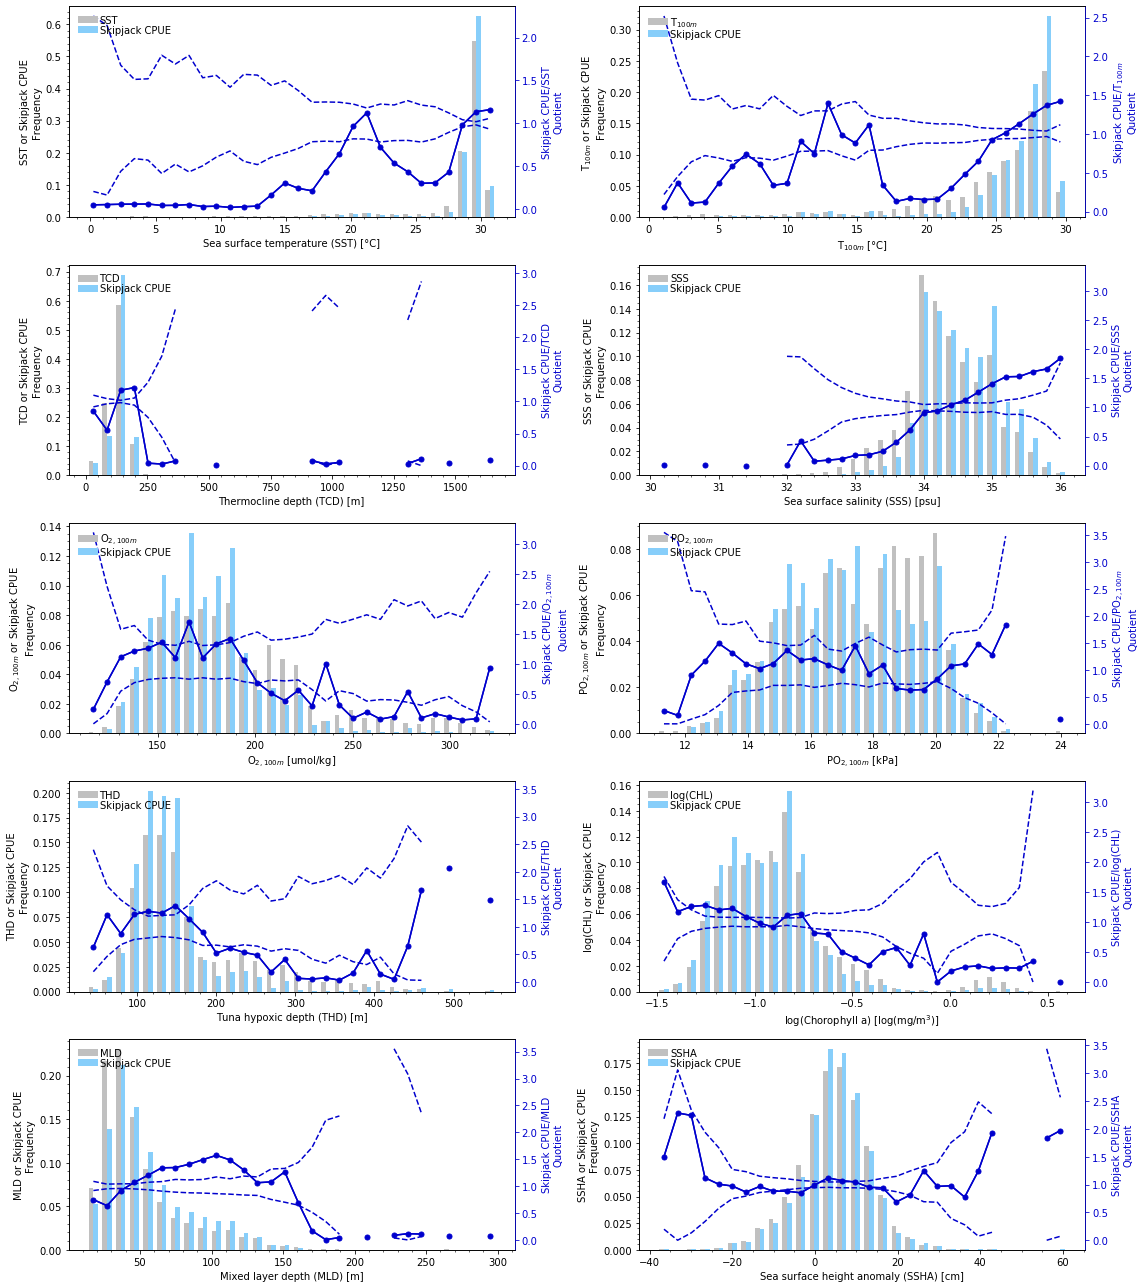

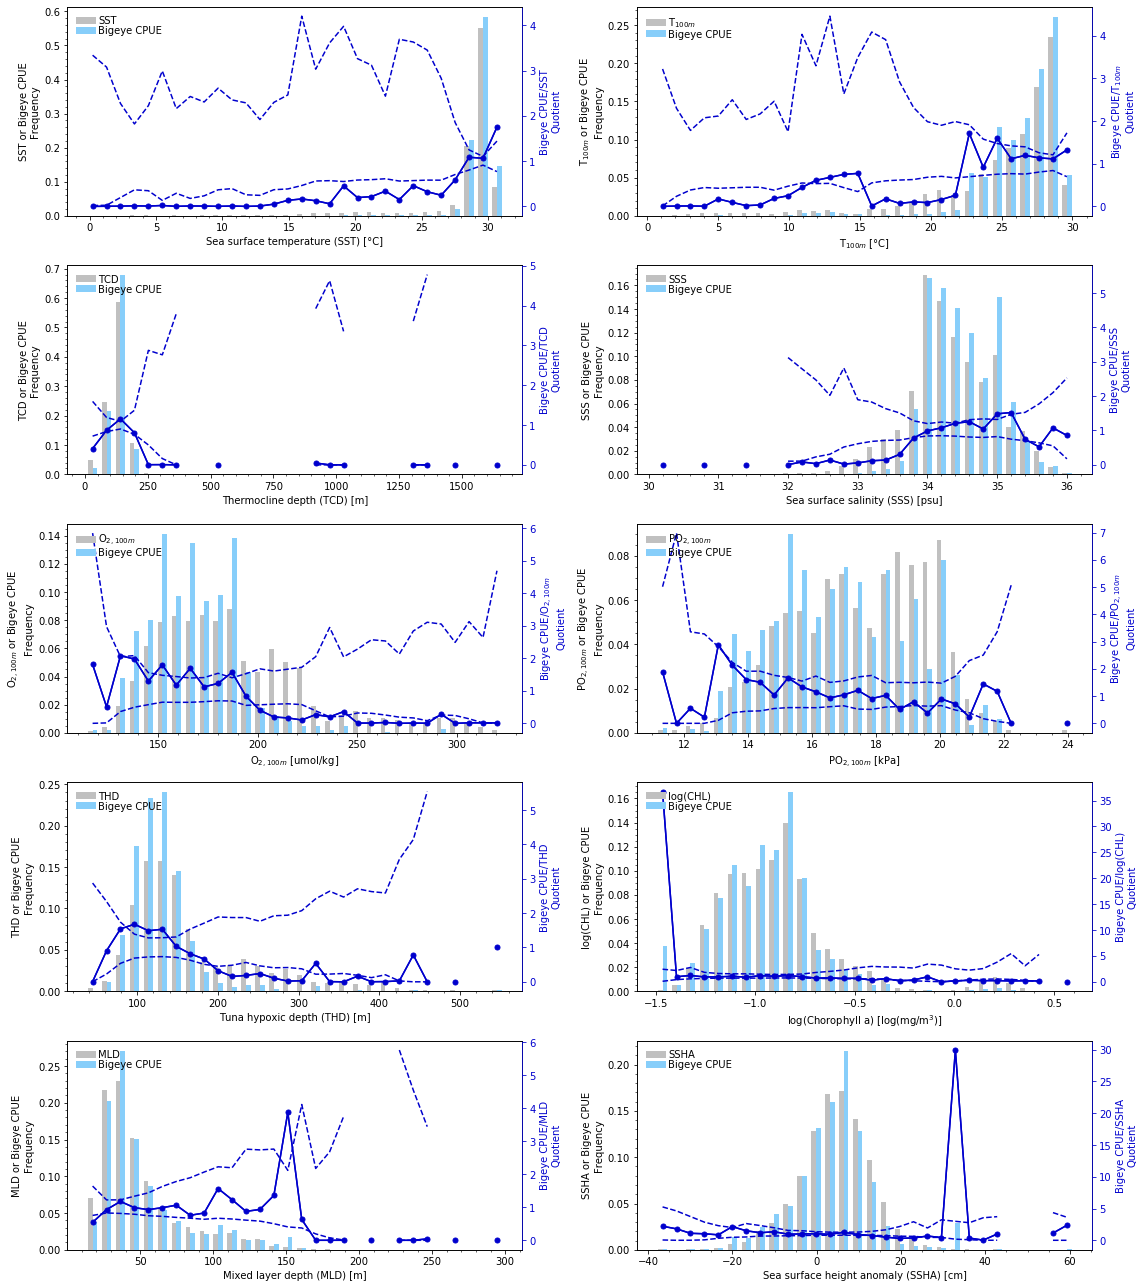

In [21]:
%run figure_notebooks/suppfig4_5.ipynb

### Figure 6

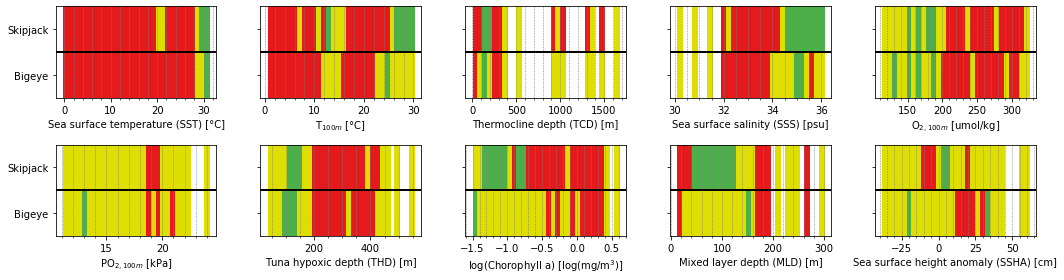

In [22]:
%run figure_notebooks/fig6.ipynb

### Supplementary Figures 6-8

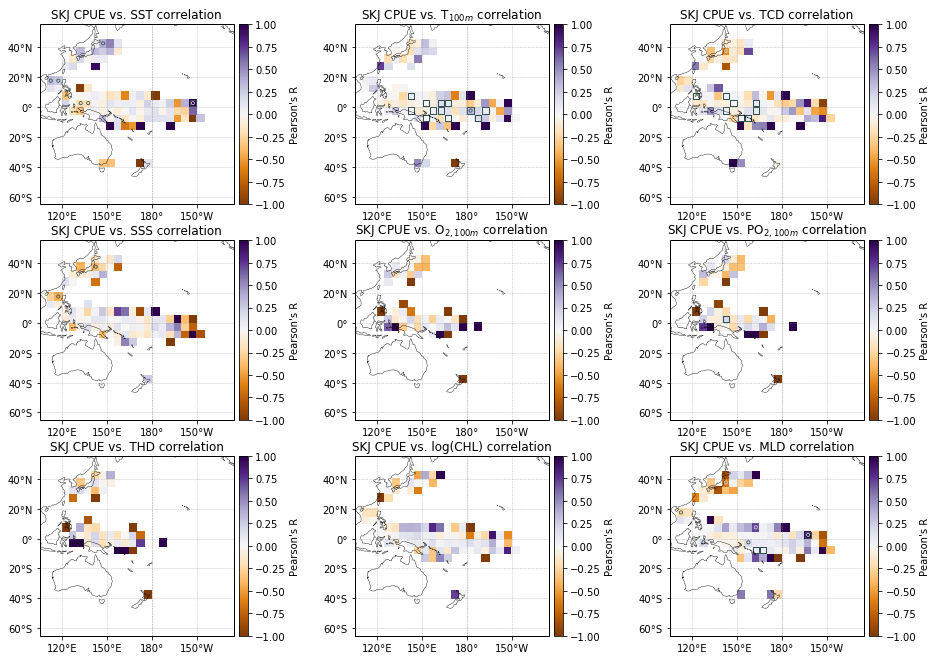

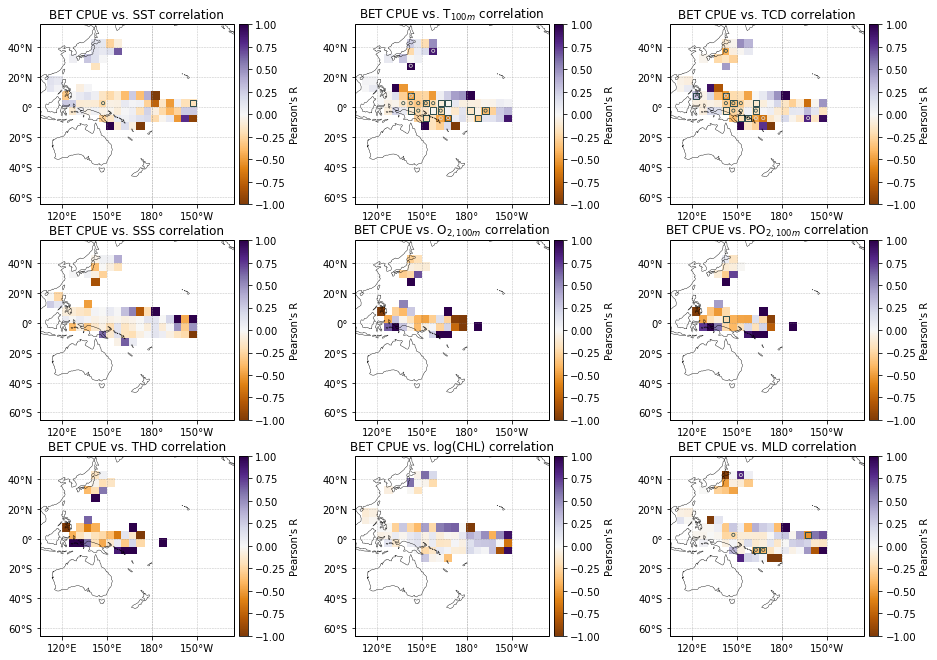

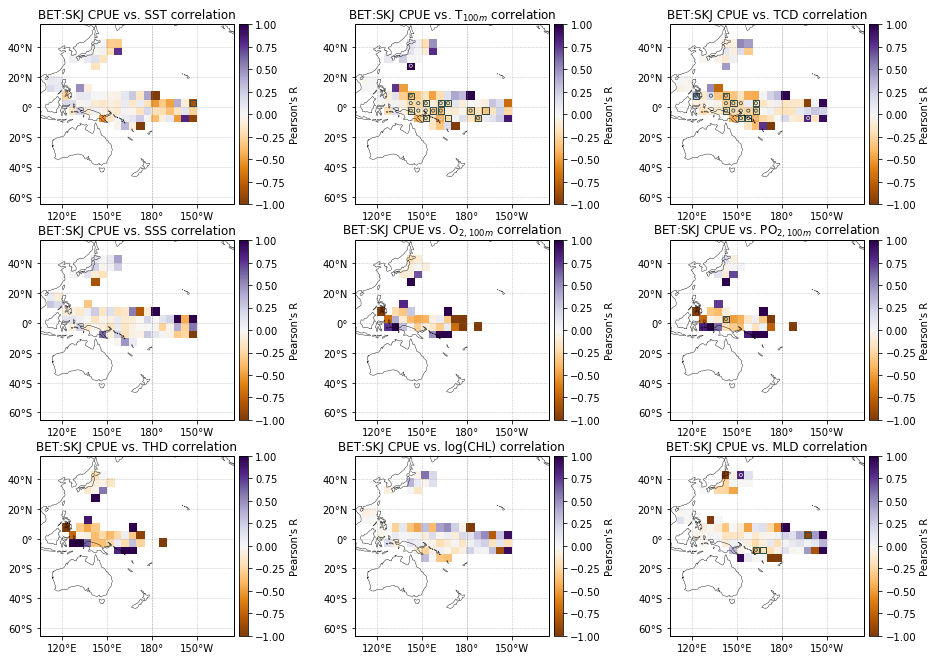

In [23]:
%run figure_notebooks/suppfig6_8.ipynb

### Figure 7

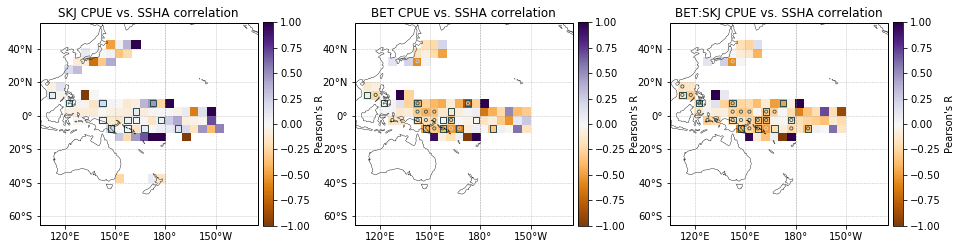

In [24]:
%run figure_notebooks/fig7.ipynb